Importing Libraries

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

Loading Main Dataset

In [200]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Decision Tree Classifier\datasets\churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [202]:
df.duplicated().sum()

np.int64(0)

In [203]:
df.isna().sum().sum()

np.int64(0)

In [204]:
region_map = {
    'Northeast': ['NY', 'NJ', 'PA', 'CT', 'MA', 'VT', 'NH', 'ME', 'RI'],
    
    'South': ['TX', 'FL', 'GA', 'NC', 'VA', 'TN', 'AL', 'SC', 'LA', 
              'KY', 'OK', 'AR', 'MS', 'WV', 'MD', 'DE', 'DC'],
    
    'Midwest': ['IL', 'OH', 'MI', 'IN', 'WI', 'MN', 'MO', 'IA', 
                'KS', 'NE', 'SD', 'ND'],
    
    'West': ['CA', 'WA', 'OR', 'AZ', 'CO', 'NV', 'UT', 'NM',
             'ID', 'MT', 'WY', 'AK', 'HI']
}

df['Region'] = df['State'].map({state:region for region, states in region_map.items() for state in states})

df.drop('State', axis=1, inplace=True)

In [205]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Region
0,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,South
1,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,Midwest
2,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,Northeast
3,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,South
4,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,West


Exploratory Data Analysis

Numerical Variable Distribution

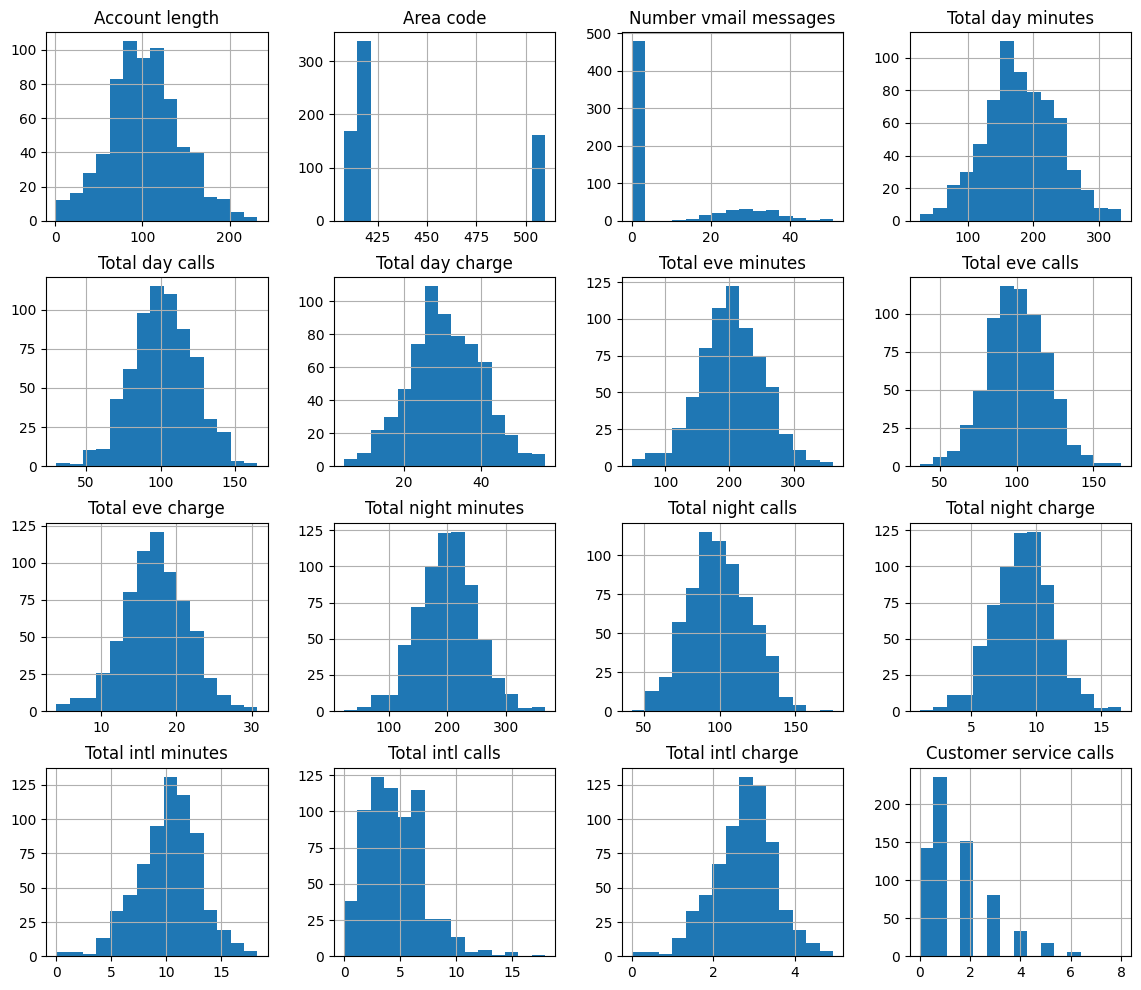

In [206]:
df_num = df._get_numeric_data().drop('Churn', axis=1)
df_num.hist(bins=15, figsize=(14,12))
plt.show()

Visualization of categorical variables

In [207]:
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['International plan', 'Voice mail plan', 'Region'], dtype='object')

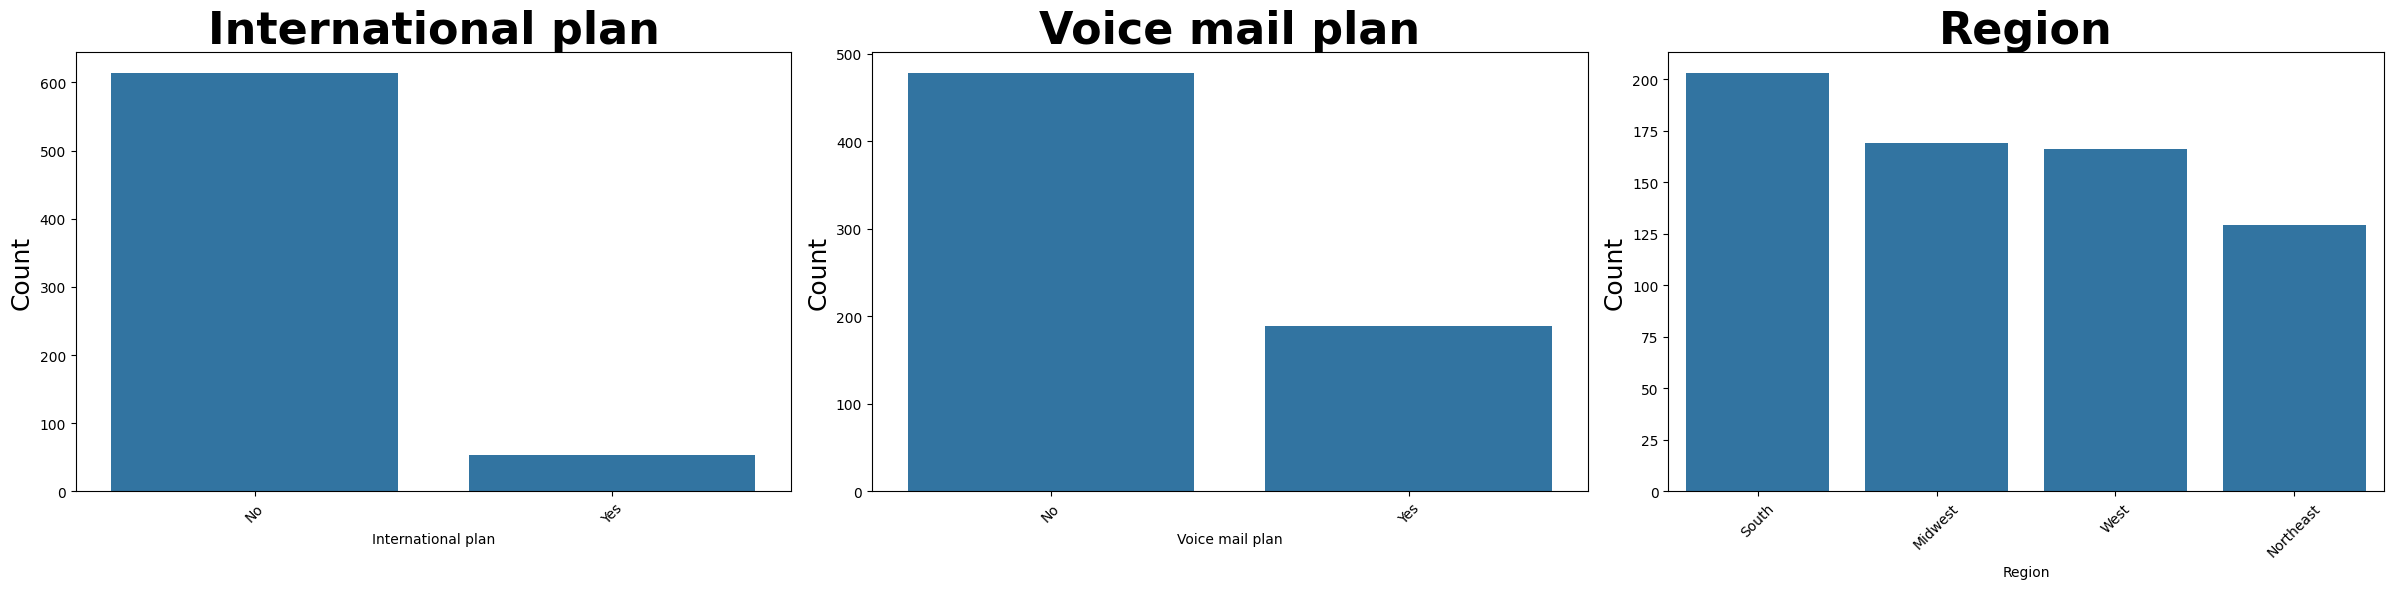

In [208]:
df_cat =['International plan', 'Voice mail plan', 'Region']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(8*n_cols, 6*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

Target Variable Distribution

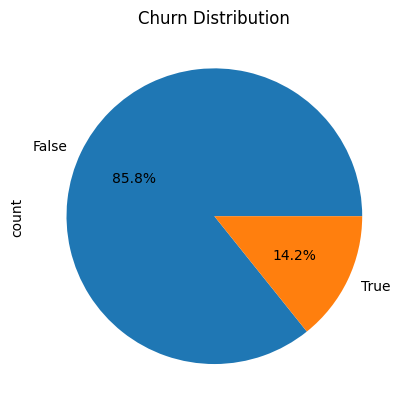

In [209]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

Feature Correlation for main dataset

In [210]:
df_num = df._get_numeric_data()

df_corr = df_num.corr()['Churn'].drop('Churn')

df_corr

Account length            0.012315
Area code                 0.027129
Number vmail messages    -0.102381
Total day minutes         0.242781
Total day calls           0.019360
Total day charge          0.242777
Total eve minutes         0.175614
Total eve calls           0.055669
Total eve charge          0.175616
Total night minutes       0.042930
Total night calls        -0.017626
Total night charge        0.042958
Total intl minutes       -0.003740
Total intl calls          0.015331
Total intl charge        -0.003681
Customer service calls    0.233259
Name: Churn, dtype: float64

In [211]:
df_num.corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)

Total day minutes         0.242781
Total day charge          0.242777
Customer service calls    0.233259
Total eve charge          0.175616
Total eve minutes         0.175614
Number vmail messages     0.102381
Total eve calls           0.055669
Total night charge        0.042958
Total night minutes       0.042930
Area code                 0.027129
Total day calls           0.019360
Total night calls         0.017626
Total intl calls          0.015331
Account length            0.012315
Total intl minutes        0.003740
Total intl charge         0.003681
Name: Churn, dtype: float64

In [212]:
df_num.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')

In [213]:
df_corr = df_num[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

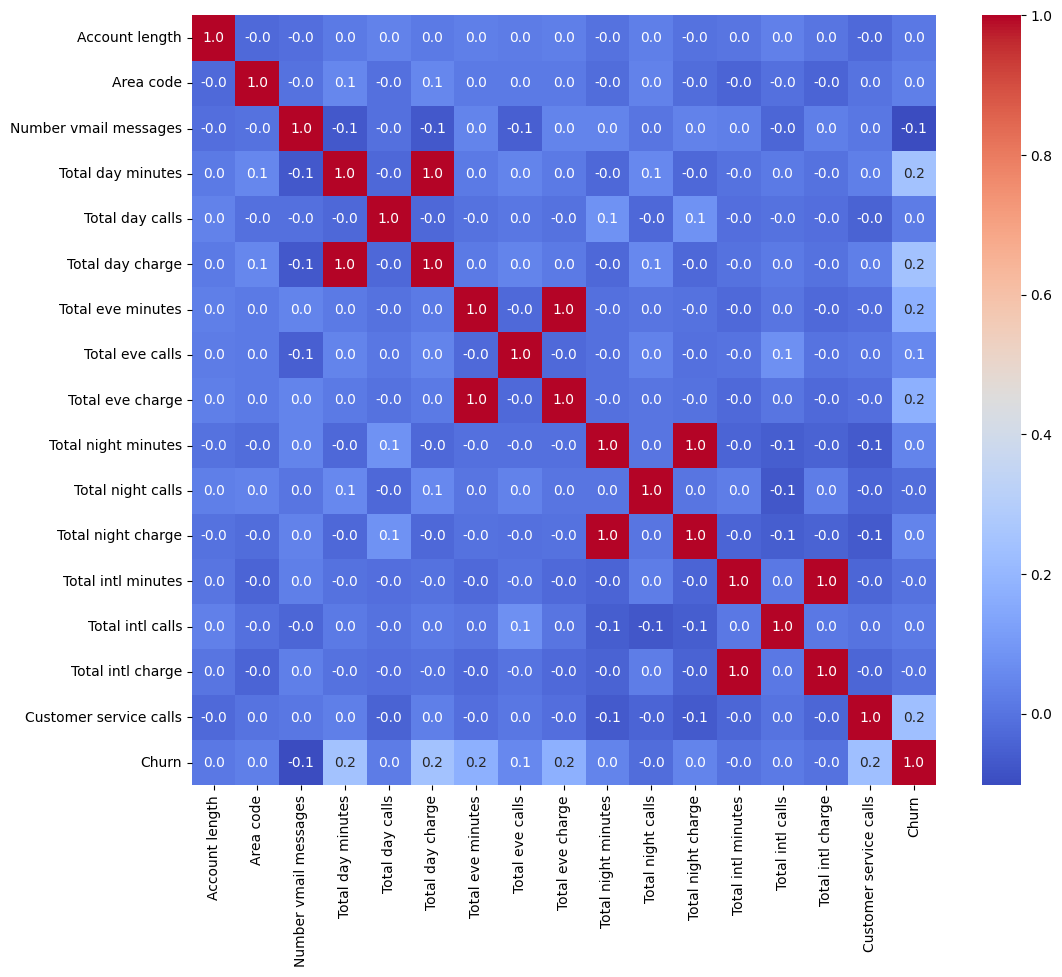

In [214]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting 

In [215]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [216]:
train.shape

(533, 20)

In [217]:
test.shape

(134, 20)

In [218]:
train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Region
551,178,415,No,Yes,35,175.4,88,29.82,190.0,65,16.15,138.7,94,6.24,10.5,3,2.84,2,False,West
46,106,408,No,Yes,32,165.9,126,28.20,216.5,93,18.40,173.1,86,7.79,14.1,8,3.81,4,False,South
618,104,408,No,No,0,280.4,127,47.67,179.4,79,15.25,150.6,77,6.78,15.2,6,4.10,5,False,Midwest
445,121,415,No,No,0,134.1,112,22.80,195.1,104,16.58,159.6,139,7.18,10.5,2,2.84,2,False,South
305,127,510,No,No,0,239.8,107,40.77,128.9,121,10.96,249.9,110,11.25,11.3,5,3.05,1,False,Northeast


In [219]:
ecd = LabelEncoder()
train['Churn'] = ecd.fit_transform(train['Churn'])

In [220]:
train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Region
551,178,415,No,Yes,35,175.4,88,29.82,190.0,65,16.15,138.7,94,6.24,10.5,3,2.84,2,0,West
46,106,408,No,Yes,32,165.9,126,28.20,216.5,93,18.40,173.1,86,7.79,14.1,8,3.81,4,0,South
618,104,408,No,No,0,280.4,127,47.67,179.4,79,15.25,150.6,77,6.78,15.2,6,4.10,5,0,Midwest
445,121,415,No,No,0,134.1,112,22.80,195.1,104,16.58,159.6,139,7.18,10.5,2,2.84,2,0,South
305,127,510,No,No,0,239.8,107,40.77,128.9,121,10.96,249.9,110,11.25,11.3,5,3.05,1,0,Northeast


In [221]:
train._get_numeric_data().columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')

In [222]:
categorical_features = ['International plan', 'Voice mail plan', 'Region']

Numerical_features = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']

In [223]:
preprocessor = ColumnTransformer(transformers=[
    ('scaled', StandardScaler(), (Numerical_features)),
    ('encoded', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), (categorical_features))
], 
remainder = 'passthrough'
)

preprocessor.set_output(transform='pandas')

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaled', ...), ('encoded', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [224]:
train_clean = preprocessor.fit_transform(train)

In [225]:
train_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total day charge,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total eve charge,scaled__Total night minutes,...,scaled__Customer service calls,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,encoded__Region_Midwest,encoded__Region_Northeast,encoded__Region_South,encoded__Region_West,remainder__Churn
551,1.837756,-0.535023,1.983109,-0.104002,-0.629192,-0.103852,-0.254049,-1.902520,-0.254072,-1.194073,...,0.296605,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
46,0.069707,-0.698831,1.763891,-0.273625,1.187956,-0.274002,0.279870,-0.420542,0.279256,-0.512699,...,1.795091,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
618,0.020594,-0.698831,-0.574437,1.770782,1.235775,1.770944,-0.467616,-1.161531,-0.467403,-0.958365,...,2.544334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
445,0.438050,-0.535023,-0.574437,-0.841417,0.518480,-0.841167,-0.151294,0.161663,-0.152147,-0.780099,...,0.296605,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
305,0.585388,1.688092,-0.574437,1.045866,0.279382,1.046233,-1.485085,1.061435,-1.484283,1.008508,...,-0.452638,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


Preprocessed Feature Correlation Analysis

In [226]:
train_clean_num = train_clean._get_numeric_data()

train_clean_corr = train_clean_num.corr()['remainder__Churn'].drop('remainder__Churn')

train_clean_corr

scaled__Account length            -0.003592
scaled__Area code                  0.001056
scaled__Number vmail messages     -0.111139
scaled__Total day minutes          0.232065
scaled__Total day calls           -0.004356
scaled__Total day charge           0.232059
scaled__Total eve minutes          0.161494
scaled__Total eve calls            0.052294
scaled__Total eve charge           0.161488
scaled__Total night minutes        0.039027
scaled__Total night calls          0.008029
scaled__Total night charge         0.039073
scaled__Total intl minutes         0.027204
scaled__Total intl calls           0.005429
scaled__Total intl charge          0.027261
scaled__Customer service calls     0.253626
encoded__International plan_No    -0.214144
encoded__International plan_Yes    0.214144
encoded__Voice mail plan_No        0.112244
encoded__Voice mail plan_Yes      -0.112244
encoded__Region_Midwest           -0.003158
encoded__Region_Northeast          0.035578
encoded__Region_South           

In [227]:
train_clean_num.corr()['remainder__Churn'].drop('remainder__Churn').abs().sort_values(ascending=False)

scaled__Customer service calls     0.253626
scaled__Total day minutes          0.232065
scaled__Total day charge           0.232059
encoded__International plan_No     0.214144
encoded__International plan_Yes    0.214144
scaled__Total eve minutes          0.161494
scaled__Total eve charge           0.161488
encoded__Voice mail plan_Yes       0.112244
encoded__Voice mail plan_No        0.112244
scaled__Number vmail messages      0.111139
encoded__Region_South              0.055670
scaled__Total eve calls            0.052294
scaled__Total night charge         0.039073
scaled__Total night minutes        0.039027
encoded__Region_Northeast          0.035578
encoded__Region_West               0.030271
scaled__Total intl charge          0.027261
scaled__Total intl minutes         0.027204
scaled__Total night calls          0.008029
scaled__Total intl calls           0.005429
scaled__Total day calls            0.004356
scaled__Account length             0.003592
encoded__Region_Midwest         

In [228]:
train_clean.columns

Index(['scaled__Account length', 'scaled__Area code',
       'scaled__Number vmail messages', 'scaled__Total day minutes',
       'scaled__Total day calls', 'scaled__Total day charge',
       'scaled__Total eve minutes', 'scaled__Total eve calls',
       'scaled__Total eve charge', 'scaled__Total night minutes',
       'scaled__Total night calls', 'scaled__Total night charge',
       'scaled__Total intl minutes', 'scaled__Total intl calls',
       'scaled__Total intl charge', 'scaled__Customer service calls',
       'encoded__International plan_No', 'encoded__International plan_Yes',
       'encoded__Voice mail plan_No', 'encoded__Voice mail plan_Yes',
       'encoded__Region_Midwest', 'encoded__Region_Northeast',
       'encoded__Region_South', 'encoded__Region_West', 'remainder__Churn'],
      dtype='object')

In [229]:
train_clean_corr = train_clean[['scaled__Account length', 'scaled__Area code',
       'scaled__Number vmail messages', 'scaled__Total day minutes',
       'scaled__Total day calls', 'scaled__Total day charge',
       'scaled__Total eve minutes', 'scaled__Total eve calls',
       'scaled__Total eve charge', 'scaled__Total night minutes',
       'scaled__Total night calls', 'scaled__Total night charge',
       'scaled__Total intl minutes', 'scaled__Total intl calls',
       'scaled__Total intl charge', 'scaled__Customer service calls',
       'encoded__International plan_No', 'encoded__International plan_Yes',
       'encoded__Voice mail plan_No', 'encoded__Voice mail plan_Yes',
       'encoded__Region_Midwest', 'encoded__Region_Northeast',
       'encoded__Region_South', 'encoded__Region_West', 'remainder__Churn']]

train_clean_corr = train_clean_corr.corr()

Preprocessed Feature Correlation Heatmap

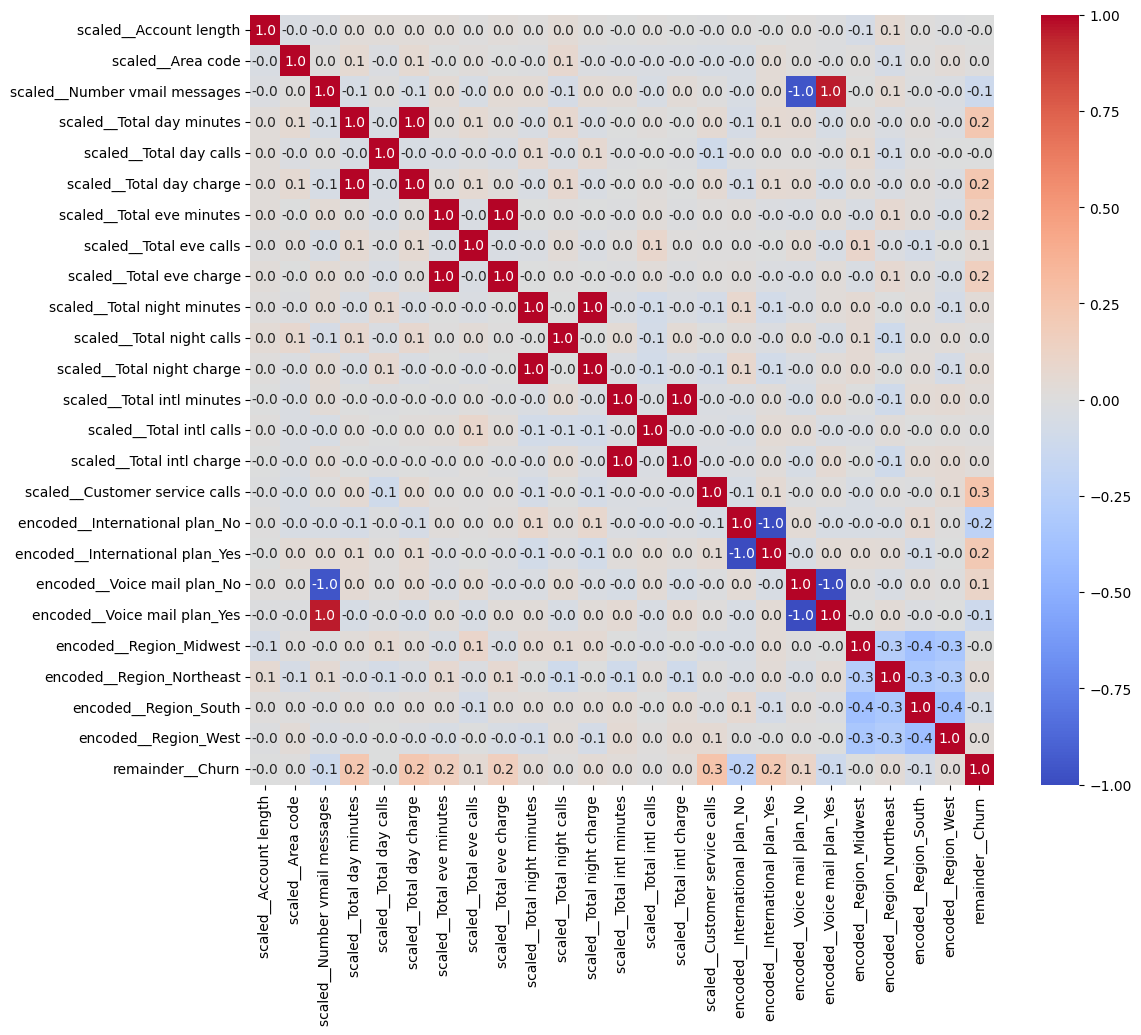

In [230]:
plt.figure(figsize=(12,10))
sns.heatmap(data=train_clean_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [231]:
train_clean.to_csv('churn train data.csv', index=False)
test.to_csv('churn test data.csv', index=False)
joblib.dump(preprocessor, 'churn preprocessor.pkl')

['churn preprocessor.pkl']